# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons, make_circles, make_classification

algorithm_space = classifiers.Classifier.algorithmspace
#X, y = make_moons(noise=0.3, random_state=0)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [2]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5



In [14]:
from see.base_classes import pipedata
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

individual = Classifier()

dataset = pipedata()
training_set = pipedata()
testing_set = pipedata()

# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

training_set.X = X_train
training_set.y = y_train
testing_set.X = X_test
testing_set.y = y_test

dataset.training_set = training_set
dataset.testing_set = testing_set

dataset.k_folds = False

# Split data into training and testing sets using KFolds
#kf = KFold(n_splits=2)
#folds = list(kf.split(X))
#n_splits = kf.get_n_splits(X)

#dataset.training_folds = np.empty(n_splits,dtype=object)
#dataset.testing_folds = np.empty(n_splits,dtype=object)

#for i, train_test_index in enumerate(kf.split(X)):
#    train_index, test_index = train_test_index
#    training_fold = pipedata()
#    testing_fold = pipedata()
#    training_fold.X, testing_fold.X = X[train_index], X[test_index]
#    training_fold.y, testing_fold.y = y[train_index], y[test_index]
#    dataset.training_folds[i] = training_fold
#    dataset.testing_folds[i] = testing_fold

#dataset.k_folds = True

individual.runAlgo(dataset)

<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 0.288 s


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = dataset

In [6]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=50)

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=20)

Initializing a new random population
Generation 0/20 of population size 50
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 568
	alpha = 0.6015
	max_depth = 515
	n_estimators = 668
	n_neighbors = 817

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.335 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 209
	alpha = 0.2273
	max_depth = 609
	n_estimators = 278
	n_neighbors = 861

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.33 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 70
	alpha = 0.5825
	max_depth = 987
	n_estimators = 451
	n_neighbors = 153

predicti

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.293 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 37
	alpha = 0.5593
	max_depth = 800
	n_estimators = 815
	n_neighbors = 758

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.244 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 889
	alpha = 0.4581
	max_depth = 809
	n_estimators = 278
	n_neighbors = 881

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.256 s
fitness=0.1

<class 'see.Workflow.workflow'

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.275 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 199
	alpha = 0.2512
	max_depth = 355
	n_estimators = 889
	n_neighbors = 683

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 958
	alpha = 0.1367
	max_depth = 408
	n_estimators = 538
	n_neighbors = 111

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.265 s
fitness=0.1

<

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.267 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 170
	alpha = 0.6909
	max_depth = 28
	n_estimators = 957
	n_neighbors = 153

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 909
	alpha = 0.0832
	max_depth = 497
	n_estimators = 837
	n_neighbors = 603

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.275 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 85
	alpha = 0.5055
	max_depth = 964
	n_estimators = 72
	n_neighbors = 10

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 785
	alpha = 0.1214
	max_depth = 320
	n_estimators = 863
	n_neighbors = 765

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3

<class 's

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.247 s
fitness=0.1

#BEST [0.05,  ['K Nearest Neighbors', 977, 0.0983, 403, 61, 263]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 2/20 of population size 50
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 23
	alpha = 0.2001
	max_depth = 412
	n_estimators = 980
	

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 1 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.486 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 309
	alpha = 0.2556
	max_depth = 424
	n_estimators = 56
	n_neighbors = 20

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.26 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 539
	alpha = 0.1452
	max_depth = 436
	n_estimators = 644
	n_neighbors = 589

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.269 s
fitness=0.1

<class 'see.Workflow.workflow'

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.441 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 977
	alpha = 0.2327
	max_depth = 403
	n_estimators = 61
	n_neighbors = 753

RUNNING EVAL FOR KNN
N NEIGHBORS 753
PARAM IN RANGE False
predictions [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.006 s
fitness=0.4

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 193
	alpha = 0.0983
	max_depth = 84
	n_estimators = 628
	n_neighbors = 263

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.325 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 771
	alpha = 0.8894
	max_depth = 19
	n_estimators = 35
	n_neighbors = 797

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.067 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 147
	alpha = 0.3051
	max_depth = 756
	n_estimators = 255
	n_neighbors = 842

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.004 s
fitness=0.3

<class

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.33 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 320
	alpha = 0.5713
	max_depth = 319
	n_estimators = 992
	n_neighbors = 522

RUNNING EVAL FOR KNN
N NEIGHBORS 522
PARAM IN RANGE False
predictions [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.009 s
fitness=0.4

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 977
	alpha = 0.0983
	max_depth = 403
	n_estimators = 61
	n_neighbors = 263

RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
predictions [0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.241 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 335
	alpha = 0.2432
	max_depth = 43
	n_estimators = 670
	n_neighbors = 327

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.008 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 203
	alpha = 0.689
	max_depth = 418
	n_estimators = 184
	n_neighbors = 461

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> paramet

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.266 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 960
	alpha = 0.4684
	max_depth = 810
	n_estimators = 820
	n_neighbors = 106

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.267 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 799
	alpha = 0.8275
	max_depth = 534
	n_estimators = 372
	n_neighbors = 36

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.225

<class 'see.Workflow.workflow'> p

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.278 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 37
	alpha = 0.5593
	max_depth = 800
	n_estimators = 815
	n_neighbors = 758

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.246 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 803
	alpha = 0.3302
	max_depth = 403
	n_estimators = 721
	n_neighbors = 263

RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
predictions [0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.704 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 173
	alpha = 0.8574
	max_depth = 89
	n_estimators = 755
	n_neighbors = 22

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.004 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 656
	alpha = 0.7773
	max_depth = 18
	n_estimators = 85
	n_neighbors = 76

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.25 s
fitness=0.125

<class 'see.Workflow.workflow'> parame

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.292 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 623
	alpha = 0.7511
	max_depth = 787
	n_estimators = 773
	n_neighbors = 945

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 464
	alpha = 0.4436
	max_depth = 83
	n_estimators = 127
	n_neighbors = 846

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.275 s
fitness=0.1

<class 'see.Workflow.workflow'> par

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.333 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 5
	alpha = 0.7665
	max_depth = 127
	n_estimators = 20
	n_neighbors = 381

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.324 s
fitness=0.1

#BEST [0.05,  ['K Nearest Neighbors', 803, 0.0983, 403, 61, 263]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.256 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 540
	alpha = 0.4936
	max_depth = 349
	n_estimators = 397
	n_neighbors = 808

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.299 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 98
	alpha = 0.4092
	max_depth = 948
	n_estimators = 852
	n_neighbors = 940

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.336 s
fitness=0.175

<class 'see.Workflow.workflow'>

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.299 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 889
	alpha = 0.4581
	max_depth = 84
	n_estimators = 628
	n_neighbors = 881

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.303 s
fitness=0.1

#BEST [0.05,  ['K Nearest Neighbors', 977, 0.0983, 403, 721, 263]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm 

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.263 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 221
	alpha = 0.1204
	max_depth = 510
	n_estimators = 66
	n_neighbors = 554

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 845
	alpha = 0.5121
	max_depth = 74
	n_estimators = 228
	n_neighbors = 800

RUNNING EVAL FOR KNN
N NEIGHBORS 800
PARAM IN RANGE False
predictions [0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.255 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 393
	alpha = 0.8147
	max_depth = 947
	n_estimators = 964
	n_neighbors = 277

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.33 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 960
	alpha = 0.1245
	max_depth = 354
	n_estimators = 559
	n_neighbors = 675

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.859 s
fitness=0.15

<class 'see.Workflow.workflow'> pa

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.355 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 290
	alpha = 0.6868
	max_depth = 869
	n_estimators = 29
	n_neighbors = 791

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.045 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 674
	alpha = 0.4736
	max_depth = 145
	n_estimators = 917
	n_neighbors = 911

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.005 s
fitness=0.3

<clas

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.723 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 129
	alpha = 0.2997
	max_depth = 464
	n_estimators = 16
	n_neighbors = 425

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.006 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 991
	alpha = 0.9013
	max_depth = 376
	n_estimators = 191
	n_neighbors = 57

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.254 s
fitness=0.1

<

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.233 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 839
	alpha = 0.2373
	max_depth = 447
	n_estimators = 809
	n_neighbors = 77

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 644
	alpha = 0.2034
	max_depth = 415
	n_estimators = 216
	n_neighbors = 562

RUNNING EVAL FOR KNN
N NEIGHBORS 562
PARAM IN RANGE False
predictions [1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1
 1 1 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Tim

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.767 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 259
	alpha = 0.6043
	max_depth = 255
	n_estimators = 547
	n_neighbors = 980

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 67
	alpha = 0.8935
	max_depth = 670
	n_estimators = 930
	n_neighbors = 394

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.246 s
fitness=0.1

<class 'see.Workflow.workflow'>

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.906 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 926
	alpha = 0.1497
	max_depth = 897
	n_estimators = 192
	n_neighbors = 990

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.263 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 14
	alpha = 0.965
	max_depth = 23
	n_estimators = 103
	n_neighbors = 667

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.277 s
fitness=0.1

<class 'see.Workflow.workflow'

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.302 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 458
	alpha = 0.0158
	max_depth = 870
	n_estimators = 99
	n_neighbors = 983

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.298 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 624
	alpha = 0.1699
	max_depth = 283
	n_estimators = 439
	n_neighbors = 700

RUNNING EVAL FOR KNN
N NEIGHBORS 700
PARAM IN RANGE False
predictions [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.271 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 99
	alpha = 0.536
	max_depth = 131
	n_estimators = 625
	n_neighbors = 559

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.002 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 176
	alpha = 0.0118
	max_depth = 855
	n_estimators = 434
	n_neighbors = 199

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.004 s
fitness=0.3

<class '

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.199 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 458
	alpha = 0.0788
	max_depth = 715
	n_estimators = 870
	n_neighbors = 70

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 317
	alpha = 0.7475
	max_depth = 367
	n_estimators = 338
	n_neighbors = 127

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.515 s
fitness=0.2

<clas

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.306 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 558
	alpha = 0.0176
	max_depth = 337
	n_estimators = 335
	n_neighbors = 503

RUNNING EVAL FOR KNN
N NEIGHBORS 503
PARAM IN RANGE False
predictions [0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.007 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 622
	alpha = 0.097
	max_depth = 434
	n_estimators = 539
	n_neighbors = 904

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.5 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 465
	alpha = 0.173
	max_depth = 797
	n_estimators = 863
	n_neighbors = 391

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.26 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 438
	alpha = 0.2383
	max_depth = 613
	n_estimators = 375
	n_neighbors = 929

RUNNING EVAL FOR KNN
N NEIGHBORS 929
PARAM IN RANGE False
predictions [1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Ti

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.806 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 993
	alpha = 0.435
	max_depth = 740
	n_estimators = 589
	n_neighbors = 6

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.005 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 726
	alpha = 0.0618
	max_depth = 803
	n_estimators = 167
	n_neighbors = 627

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.261 s
fitness=0.225

<clas

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.277 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 750
	alpha = 0.0628
	max_depth = 363
	n_estimators = 535
	n_neighbors = 974

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.004 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 45
	alpha = 0.6972
	max_depth = 760
	n_estimators = 665
	n_neighbors = 554

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.987 s
fitness=0.175

<clas

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.312 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 323
	alpha = 0.6486
	max_depth = 825
	n_estimators = 65
	n_neighbors = 11

RUNNING EVAL FOR KNN
N NEIGHBORS 11
PARAM IN RANGE True
predictions [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.007 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 565
	alpha = 0.2759
	max_depth = 139
	n_estimators = 449
	n_neighbors = 388

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.688 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 740
	alpha = 0.5711
	max_depth = 776
	n_estimators = 733
	n_neighbors = 379

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.09 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 393
	alpha = 0.9611
	max_depth = 978
	n_estimators = 406
	n_neighbors = 802

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.264 s
fitness=0.1

<class 'see.Workflow.workflow'> p

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.612 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 569
	alpha = 0.4776
	max_depth = 343
	n_estimators = 345
	n_neighbors = 980

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.248 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 549
	alpha = 0.0603
	max_depth = 702
	n_estimators = 385
	n_neighbors = 203

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3


predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.374 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 975
	alpha = 0.5722
	max_depth = 510
	n_estimators = 902
	n_neighbors = 489

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 316
	alpha = 0.1546
	max_depth = 959
	n_estimators = 846
	n_neighbors = 259

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.251 s
fitness=0.1

<class 'see.Workflow.workflow'> 

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.256 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 794
	alpha = 0.9616
	max_depth = 788
	n_estimators = 787
	n_neighbors = 966

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.248 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 706
	alpha = 0.7168
	max_depth = 598
	n_estimators = 471
	n_neighbors = 515

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.225

<class 'see.Workflow.workflow'> par

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.299 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 871
	alpha = 0.2972
	max_depth = 48
	n_estimators = 517
	n_neighbors = 492

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.002 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 797
	alpha = 0.7579
	max_depth = 736
	n_estimators = 126
	n_neighbors = 603

RUNNING EVAL FOR KNN
N NEIGHBORS 603
PARAM IN RANGE False
predictions [0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
T

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.776 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 848
	alpha = 0.1126
	max_depth = 935
	n_estimators = 871
	n_neighbors = 546

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.387 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 655
	alpha = 0.9318
	max_depth = 930
	n_estimators = 569
	n_neighbors = 644

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.225

<class 'see.Workflow.workflow'> p

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.271 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 60
	alpha = 0.9349
	max_depth = 25
	n_estimators = 876
	n_neighbors = 927

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.004 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 430
	alpha = 0.5625
	max_depth = 106
	n_estimators = 281
	n_neighbors = 890

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.258 s
fitness=0.1

<class 'see.Workflow.workflow'> pa

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.067 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 422
	alpha = 0.2082
	max_depth = 589
	n_estimators = 20
	n_neighbors = 476

predictions [0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 1 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.033 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 584
	alpha = 0.1598
	max_depth = 82
	n_estimators = 528
	n_neighbors = 315

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.3

<class

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.264 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 648
	alpha = 0.9293
	max_depth = 337
	n_estimators = 852
	n_neighbors = 558

RUNNING EVAL FOR KNN
N NEIGHBORS 558
PARAM IN RANGE False
predictions [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.007 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 855
	alpha = 0.6732
	max_depth = 654
	n_estimators = 388
	n_neighbors = 795

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]


predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.632 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 913
	alpha = 0.2347
	max_depth = 142
	n_estimators = 79
	n_neighbors = 656

predictions [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.273 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 260
	alpha = 0.6971
	max_depth = 862
	n_estimators = 823
	n_neighbors = 178

RUNNING EVAL FOR KNN
N NEIGHBORS 178
PARAM IN RANGE False
predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.234 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 819
	alpha = 0.9786
	max_depth = 334
	n_estimators = 425
	n_neighbors = 397

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 850
	alpha = 0.6054
	max_depth = 829
	n_estimators = 652
	n_neighbors = 449

predictions [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.266 s
fitness=0.1

<class 'see.Workflow.workflow'> pa

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 1.383 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 945
	alpha = 0.8538
	max_depth = 948
	n_estimators = 585
	n_neighbors = 620

predictions [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.003 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 126
	alpha = 0.4827
	max_depth = 939
	n_estimators = 164
	n_neighbors = 942

predictions [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
targets [0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 0]
Time: 0.251 s
fitness=0.175

<class 'see.Workflow.workflow'> par

In [8]:
print(my_evolver.best_avgs)
print(my_evolver.hof)

[0.182, 0.18499999999999983, 0.18399999999999983, 0.1929999999999999, 0.1739999999999999, 0.1999999999999999, 0.16149999999999992, 0.15799999999999995, 0.17150000000000007, 0.1985000000000002, 0.17250000000000015, 0.15149999999999994, 0.15249999999999989, 0.16399999999999992, 0.18700000000000014, 0.15449999999999992, 0.1554999999999999, 0.1369999999999999, 0.1599999999999999, 0.1534999999999999, 0.13349999999999995]
[['K Nearest Neighbors', 977, 0.0983, 879, 721, 263], ['K Nearest Neighbors', 803, 0.0983, 403, 721, 263], ['K Nearest Neighbors', 977, 0.3302, 403, 61, 263], ['K Nearest Neighbors', 600, 0.8227, 879, 544, 503], ['K Nearest Neighbors', 977, 0.0983, 403, 721, 263], ['K Nearest Neighbors', 803, 0.3302, 403, 61, 263], ['K Nearest Neighbors', 803, 0.0983, 403, 61, 263], ['K Nearest Neighbors', 977, 0.3302, 403, 721, 263], ['K Nearest Neighbors', 803, 0.3302, 403, 721, 263], ['K Nearest Neighbors', 977, 0.0983, 403, 61, 263]]


RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
predictions [1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0]
targets [1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 0]
RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
predictions [1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0]
targets [1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 0]
RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
predictions [1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0]
targets [1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 0]
RUNNING EVAL FOR KNN
N NEIGHBORS 263
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 503
PARAM IN RANGE False
predictions [1 0 1 1 0 1 1 1 1 1 1 1

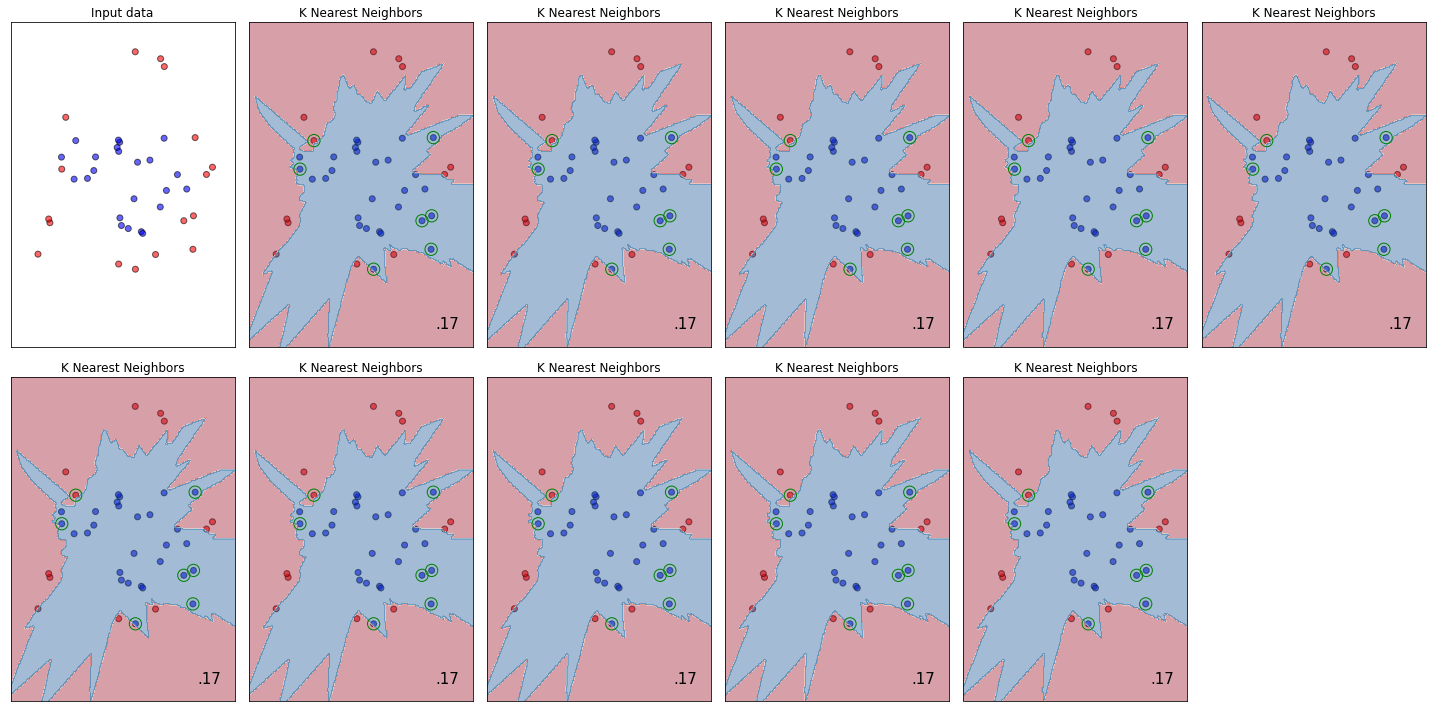

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Plot populations
# Plot
# Training Set (omitted)
# Subplot 1: Testing Set (Ground Truth)
# Subplot 2: Predictions for Testing Set

cm = plt.cm.RdBu
h = 0.02

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)
# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")

for i, ind in enumerate(solution_set):
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    score = ClassifierFitness().evaluate(predictions, y_test)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
    # Draw Contour
    contour_set = pipedata()
    contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.
    Z = clf.evaluate(training_set, contour_set)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight errors
    # TODO: looks funny, find a way to extract errors without [0]
    errors = np.where(np.not_equal(predictions, y_test))[0]
    for _, mistake in enumerate(errors):
        err = X_test[mistake,:]
        ax.scatter(err[0], err[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    ax.set_title(algo_name)

#print(population)
#print(len(population))
#print(mydata.testing_set.X)
#print(mydata.testing_set.y)
plt.tight_layout()

In [10]:
my_evolver.hof[0]
print(my_evolver.hof)

[['K Nearest Neighbors', 977, 0.0983, 879, 721, 263], ['K Nearest Neighbors', 803, 0.0983, 403, 721, 263], ['K Nearest Neighbors', 977, 0.3302, 403, 61, 263], ['K Nearest Neighbors', 600, 0.8227, 879, 544, 503], ['K Nearest Neighbors', 977, 0.0983, 403, 721, 263], ['K Nearest Neighbors', 803, 0.3302, 403, 61, 263], ['K Nearest Neighbors', 803, 0.0983, 403, 61, 263], ['K Nearest Neighbors', 977, 0.3302, 403, 721, 263], ['K Nearest Neighbors', 803, 0.3302, 403, 721, 263], ['K Nearest Neighbors', 977, 0.0983, 403, 61, 263]]


## Playing with Classifiers
**This section of the notebook is not complete.**

This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

TypeError: cannot unpack non-iterable pipedata object

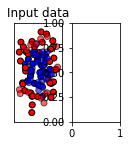

In [11]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    predictions = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
